In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Projeto 2 de Algebra Linear Numérica

1. Considere um conjunto de pontos igualmente espaçados $t_i = \frac{i}{m}$ para $i = 0, . . . , m$

**a. Regressão linear. Formule o problema de encontrar $\alpha$ e $\beta$ tais que $f (t) = \alpha + \beta t$ seja a melhor aproximação em mínimos quadrados para os pontos $(t_i , b_i )$. Ou seja, dê, em função de $t_i$ , $b_i$ e $m$, o sistema de equações que devemos resolver para encontrar $\alpha$ e $\beta$.**

Aqui, temos uma simples regressão linear! Temos os vetores 
$$
t = \begin{bmatrix} t_1 \\ t_2 \\ t_3 \\ \vdots \\ t_m \end{bmatrix}, b = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Para cada entrada desses vetores, temos uma equação $b_j = \alpha + \beta t_j$, podemos reescrever como o sistema
$$
\begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ 1 & t_3 \\ \vdots \\ 1 & t_m \end{bmatrix}
\begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_m \end{bmatrix}
$$
Queremos que a soma quadrada dos erros seja a menor possível, então, podemos escrever a função de erro:
$$
E(\alpha, \beta) = \frac{1}{2} \sum_{i = 0}^m(b_i - (\alpha + \beta t_i))^2
$$
Queremos então minimizar essa função, podemos escrever seu gradiente e igualá-lo a $0$ correto?
$$
\frac{\partial E}{\partial \alpha}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m{b_i - \alpha - \beta t_i} = \sum_{i = 0}^m{b_i - \alpha - \beta t_i}

\\

\frac{\partial E}{\partial \beta}(\alpha, \beta) = \frac{1}{2} 2 \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i = \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i

\\

\nabla E(\alpha, \beta) = \sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix}
$$

Se igualarmos a 0 e reescrevermos deixando o somatório dentro e separando em vários somatórios temos:
$$
\sum_{i = 0}^m \begin{bmatrix}
    b_i - \alpha - \beta t_i \\
    (b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i) \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i = 0}^m b_i - \sum_{i = 0}^m\alpha - \beta \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^m(b_i - \alpha - \beta t_i)t_i
\end{bmatrix} = 0
$$

Ou seja, temos dois sistemas de equações para serem resolvidos:
$$
\begin{cases} 
  \sum_{i = 0}^m b_i = (m+1)\alpha + \beta \sum_{i = 0}^mt_i \\
  \sum_{i = 0}^mt_ib_i = \alpha\sum_{i = 0}^mt_i + \beta\sum_{i = 0}^m t_i^2
\end{cases}
$$

Ou, reescrevendo com matrizes:
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

Ou seja, criamos um novo sistema $A x = c$

Vamos fazer um exemplo usando python e mostrando visualmente e resolvendo da forma que mostramos

In [14]:
np.random.seed(0)  # Definindo uma seed

# Gerando pontos aleatórios
m = 20  # Decidindo quantos pontos eu terei
t = np.array([i/m for i in range(m+1)]).reshape((-1, 1))  # Gerando t
b = np.random.random_sample((t.shape[0], 1))  # Gerando b

Agora que defini as $b$, $t$ e $m$, vamos ver como fica plotando os pontos no gráfico!

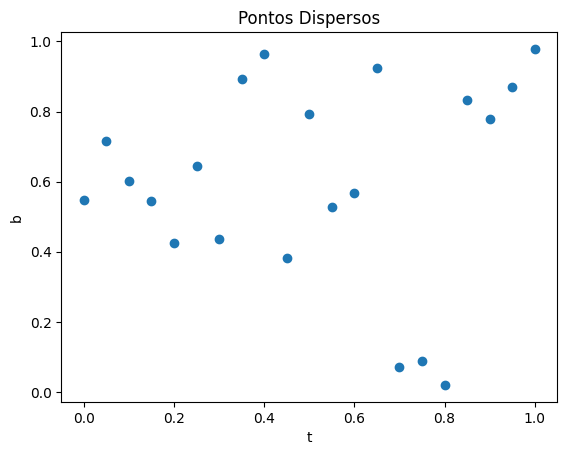

In [15]:
plt.scatter(t, b)
plt.title("Pontos Dispersos")
plt.ylabel('b')
plt.xlabel('t')
plt.show()

Vamos agora fazer o algoritmo para encontrar a reta $f(x) = \alpha + \beta t$ utilizando
$$
\begin{bmatrix}
    \sum_{i = 0}^m b_i \\
    \sum_{i = 0}^mt_ib_i
\end{bmatrix} =

\begin{bmatrix}
    m+1 & \sum_{i = 0}^mt_i \\
    \sum_{i = 0}^mt_i & \sum_{i = 0}^m t_i^2
\end{bmatrix}

\begin{bmatrix}
    \alpha \\ \beta
\end{bmatrix}
$$

In [16]:
# Calculando
c = np.array([
    b.sum(),
    (t.T @ b)[0,0]
]).reshape(-1, 1)

A = np.array([
    m + 1, t.sum(),
    t.sum(), np.linalg.norm(t)**2
]).reshape(2, 2)


coefficients = np.linalg.solve(A, c)
coefficients

array([[0.5759977 ],
       [0.04892982]])

Encontramos os nossos coeficientes! Vamos vizualisar como isso fica no gráfico!

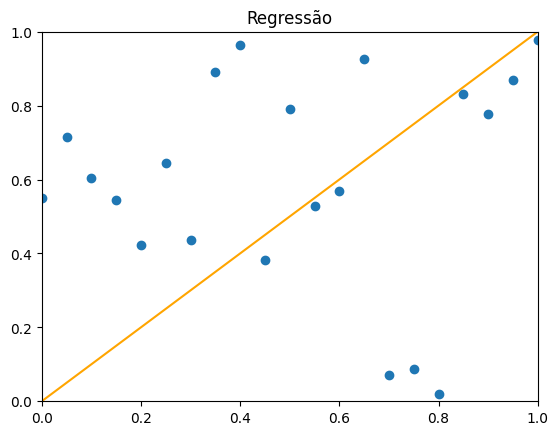

In [17]:
x = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]
y = np.linspace(-100, 100, 1000) * coefficients[1] + coefficients[0]

plt.plot(x,y, color="orange", label="Regressão Linear")
plt.scatter(t, b)
plt.title("Regressão")
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.show()

=================================================================================================

**b. Calcule (numericamente), para vários valores de $m$, o condicionamento da matriz $A$
correspondente. O que parece acontecer?**

Show, apenas lembrando a definição de condicionamento de uma matriz
$$
\kappa(A) = \|A\|\|A^{-1}\|
$$

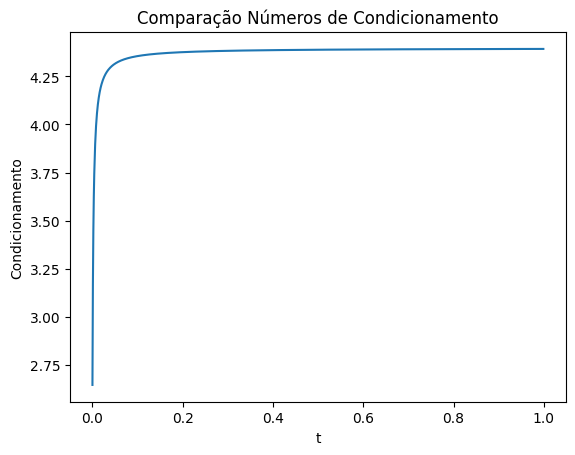

In [18]:
np.random.seed(0)
# Gerando pontos aleatórios
m = 1000  # Decidindo quantos pontos eu terei

conditions = []


for j in range(m):
    if j == 0:
        continue

    t = np.array([[1, i/(j)] for i in range(j+1)]).reshape((-1, 2))  # Gerando t

    linear_eq_matrix = t.T @ t

    conditions.append(
        np.sqrt( np.linalg.norm(linear_eq_matrix) * np.linalg.norm(np.linalg.solve(linear_eq_matrix, np.eye(2))) )
    )


plt.title("Comparação Números de Condicionamento")
plt.xlabel("t")
plt.ylabel("Condicionamento")

plt.plot(t[:-1, 1], conditions)

plt.show()

Essa curva parece estar convergindo para um valor, vamos ver os condicionamentos computados:

In [19]:
conditions

[np.float64(2.6457513110645907),
 np.float64(3.1688588903052577),
 np.float64(3.4480268109295342),
 np.float64(3.62284418654736),
 np.float64(3.742929842987149),
 np.float64(3.830614978187068),
 np.float64(3.8974961437410296),
 np.float64(3.9502109648304438),
 np.float64(3.9928387073310323),
 np.float64(4.028026812224566),
 np.float64(4.057569403456886),
 np.float64(4.08272590234157),
 np.float64(4.104406637524339),
 np.float64(4.1232860797230755),
 np.float64(4.1398746468345236),
 np.float64(4.154565761504645),
 np.float64(4.167667578439486),
 np.float64(4.179424911706464),
 np.float64(4.190034722701425),
 np.float64(4.199657273173753),
 np.float64(4.208424296415603),
 np.float64(4.216445077421154),
 np.float64(4.223811041008454),
 np.float64(4.23059925843492),
 np.float64(4.23687515878284),
 np.float64(4.2426946479163306),
 np.float64(4.24810578076437),
 np.float64(4.253150093082269),
 np.float64(4.257863670952286),
 np.float64(4.262278016376794),
 np.float64(4.266420752932803),
 np.

Podemos ver o (visualmente) aparente crescimento logaritmico ou seguindo $f(x) = \sqrt{x}$ da norma conforme aumentamos a quantidade de pontos. Eu também aumentei a quantidade de pontos e, aparentemente, o valor está **convergindo**, mas vamos conferir se isso é verdade

Sabemos que $T^{*}T$ tem autovalores igual ao quadrado dos valores singulares de $T$, e sabemos que
$$
T^{*}T =
\begin{bmatrix}
    1 & 1 & ... & 1 \\
    t_0 & t_1 & ... & t_m
\end{bmatrix}

\begin{bmatrix}
    1 & t_0 \\
    \vdots & \vdots \\
    1 & t_m
\end{bmatrix}

=

\begin{bmatrix}
    m + 1 & \sum_{j = 0}^mt_j \\
    \sum_{j = 0}^mt_j & \sum_{j = 0}^mt_j^2
\end{bmatrix}

=

\begin{bmatrix}
    m + 1 & \sum_{j = 0}^mt_j \\
    \sum_{j = 0}^mt_j & \|t\|_2^2
\end{bmatrix}
$$

Calculando os autovalores de $T^{*}T$, temos
$$
    det(\begin{bmatrix}
        m + 1 & \sum_{j = 0}^mt_j \\
        \sum_{j = 0}^mt_j & \|t\|_2^2
    \end{bmatrix} - \lambda I) = 0
$$
$$
    det(\begin{bmatrix}
        m + 1 - \lambda & \sum_{j = 0}^mt_j \\
        \sum_{j = 0}^mt_j & \|t\|_2^2 - \lambda
    \end{bmatrix}) = 0
$$

Vou deixar tudo em função de $m$, veja:
$$
\sum_{j = 0}^mt_j = \frac{1}{m}\sum_{j = 0}^mj = \frac{1}{m}\frac{m(m+1)}{2} = \frac{m+1}{2}
$$
$$
\sum_{j=0}^m{t_j^2} = \sum_{j=1}^m{\frac{j^2}{m^2}} = \frac{1}{m^2}\sum_{j=1}^m{j^2} = \frac{1}{m^2}\frac{m(m+1)(2m+1)}{6} = \frac{(m+1)(2m+1)}{6m}
$$

Logo, eu tenho
$$
det(\begin{bmatrix}
    m + 1 - \lambda & \frac{m+1}{2} \\
    \frac{m+1}{2} & \frac{(m+1)(2m+1)}{6m} - \lambda
\end{bmatrix}) = 0
$$
$$
(m + 1 - \lambda)(\frac{(m+1)(2m+1)}{6m} - \lambda) - \frac{(m+1)^2}{4} = 0
$$

Por questões de leitura, vou escrever $f(m) = \frac{(m+1)(2m+1)}{6m}$
$$
(m + 1 - \lambda)(f(m) - \lambda) - \frac{(m+1)^2}{4} = 0
$$
$$
\lambda^2 - (m+1+f(m))\lambda + (m + 1)f(m) - \frac{(m+1)^2}{4} = 0
$$

Calculando a equação de 2º grau:
$$
\Delta = \left[f(m) + m + 1\right]^2 - 4\left[(m+1)f(m) - \frac{(m+1)^2}{4}\right]
$$

Perceba que:
$$
f(m) = \frac{m}{3} + \frac{1}{2} + \frac{1}{6m}
$$
    
Logo, se eu faço $m \rightarrow \infin$, eu tenho que $f(m) \le \frac{m}{3} + \frac{1}{2}$. Isso quer dizer que eu posso substituir por esse novo valor sem $\frac{1}{6m}$, então eu vou substituir
$$
f(m) + m + 1 \approx \frac{m}{3} + \frac{1}{2} + m + 1 = \frac{4m}{3} + \frac{3}{2}
$$
$$
(m+1)f(m) \approx (m+1)(\frac{m}{3} + \frac{1}{2}) = \frac{2m^2 + 5m + 3}{6}
$$

Substituindo tudo isso em $\Delta$:
$$
\Delta(m) = \left[ \frac{4m}{3} + \frac{3}{2} \right]^2 - 4\left[ \frac{2m^2 + 5m + 3}{6} - \frac{m^2 + 2m + 1}{4} \right]
$$
$$
\Delta(m) = \frac{16m^2}{9} + 4m + \frac{9}{4} - 4\left[ \frac{m^2 + 4m + 3}{12} \right]
$$
$$
\Delta(m) = \frac{16m^2}{9} + 4m + \frac{9}{4} - \frac{m^2 + 4m + 3}{3}
$$
$$
\Delta(m) = \frac{52m^2 + 96m + 45}{36}
$$

Trocando nem $\lambda$:
$$
\lambda(m) = \frac{-b \pm \sqrt{\Delta}}{2 a}
$$
$$
\lambda(m) = \frac{m+1+f(m) \pm \sqrt{\frac{52m^2 + 96m + 45}{36}}}{2}
$$
$$
\lambda(m) = \frac{\frac{4m}{3} + \frac{3}{2} \pm \sqrt{\frac{52m^2 + 96m + 45}{36}}}{2}
$$
$$
\lambda(m) = \frac{8m + 9 \pm \sqrt{52m^2 + 96m + 45}}{12}
$$

Ótimo! Agora, sabemos que esse valor é o quadrado dos valores singulares de $T$! Então, para calcular o condicionamento de $T$, basta que eu faça:
$$
\kappa(A) = \sqrt{\frac{\lambda_{max}}{\lambda_{min}}}
$$
$$
\kappa(A) = \sqrt{\frac{
    \frac{8m + 9 + \sqrt{52m^2 + 96m + 45}}{12}
}{
    \frac{8m + 9 - \sqrt{52m^2 + 96m + 45}}{12}
}} =
\sqrt{\frac{
    8m + 9 + \sqrt{52m^2 + 96m + 45}
}{
    8m + 9 - \sqrt{52m^2 + 96m + 45}
}}
$$

Então tiramos o limite desse condicionamento
$$
\lim_{m \rightarrow \infin}{\kappa(m)} = \lim_{m \rightarrow \infin}{\sqrt{\frac{
    8m + 9 + \sqrt{52m^2 + 96m + 45}
}{
    8m + 9 - \sqrt{52m^2 + 96m + 45}
}}}
$$
$$
\lim_{m \rightarrow \infin}{\sqrt{\frac{
    m(8 + \frac{9}{m} + \sqrt{52 + \frac{96}{m} + \frac{45}{m^2}})
}{
    m(8 + \frac{9}{m} - \sqrt{52 + \frac{96}{m} + \frac{45}{m^2}})
}}}

=

\sqrt{\frac{
    8 + \sqrt{52}
}{
    8 - \sqrt{52}
}} \approx 4.391067
$$

O que condiz com os valores de condicionamento antes computados

=================================================================================================

**c. _Mais regressores_. Suponha que, além de funções afins, podemos usar polinômios de
grau até $n$, ou seja, funções da forma $f (t) = \alpha_0 + \alpha_1 t + . . . + \alpha_n t^n$. Qual é o sistema que devemos resolver (novamente, em mínimos quadrados) para encontrar os coeficientes $\alpha_i$?**

Bem, agora temos um conjunto $(t_i, b_i)$, então queremos encontrar os coeficientes de $f(t)$ que minimizam. Podemos remontar o problema com a seguinte multiplicação matricial:
$$
\begin{bmatrix}
    1 & t_0^1 & t_0^2 & ... & t_0^n \\
    1 & t_1^1 & t_1^2 & ... & t_1^n \\
    &&\vdots&&\\
    1 & t_m^1 & t_m^2 & ... & t_m^n
\end{bmatrix}
\begin{bmatrix}
    \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_n
\end{bmatrix}

=

\begin{bmatrix}
    b_0 \\
    b_1 \\
    \vdots\\
    b_m
\end{bmatrix}
$$

Lembrando que $t_j$ é a $j$-ésima entrada de $t^* = \begin{bmatrix}t_0 & t_1 & ... & t_m\end{bmatrix}$. Ótimo! Encontramos o nosso sitema $T \alpha = y$. Vamos ter que minimizá-lo pelas equações normais, temos então:
$$
T^*T \alpha = T^*y
$$
$$
\begin{bmatrix}
      1    &   1    & ... &   1 \\
     t_0^1 & t_1^1  & ... & t_m^1 \\
     t_0^2 & t_1^2  & ... & t_m^2 \\
    \vdots & \vdots & \ddots & \vdots \\
     t_0^n & t_1^n  & ... & t_m^n
\end{bmatrix}
\begin{bmatrix}
    1 & t_0^1 & t_0^2 & ... & t_0^n \\
    1 & t_1^1 & t_1^2 & ... & t_1^n \\
    &&\vdots&&\\
    1 & t_m^1 & t_m^2 & ... & t_m^n
\end{bmatrix}
\begin{bmatrix}
    \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_n
\end{bmatrix}

=

\begin{bmatrix}
      1    &   1    & ... &   1 \\
     t_0^1 & t_1^1  & ... & t_m^1 \\
     t_0^2 & t_1^2  & ... & t_m^2 \\
    \vdots & \vdots & \ddots & \vdots \\
     t_0^n & t_1^n  & ... & t_m^n
\end{bmatrix}
\begin{bmatrix}
    b_0 \\ b_1 \\ \vdots \\ b_n
\end{bmatrix}
$$

Onde $y_j = f(t_j)$

$$
\begin{bmatrix}
         m + 1          &   \sum_{j=0}^mt_j    & \sum_{j=0}^mt_j^2 & ... & \sum_{j=0}^mt_j^n     \\
     \sum_{j=0}^mt_j    &   \sum_{j=0}^mt_j^2  & \sum_{j=0}^mt_j^3 & ... & \sum_{j=0}^mt_j^{n+1} \\
     \sum_{j=0}^mt_j^2  &   \sum_{j=0}^mt_j^3  & \sum_{j=0}^mt_j^4 & ... & \sum_{j=0}^mt_j^{n+2} \\
     \sum_{j=0}^mt_j^3  &   \sum_{j=0}^mt_j^4  & \sum_{j=0}^mt_j^5 & ... & \sum_{j=0}^mt_j^{n+3} \\
         \vdots         &        \vdots        &      \vdots      &\ddots&        \vdots         \\
     \sum_{j=0}^mt_j^{n}  &   \sum_{j=0}^mt_j^{n+1}  & \sum_{j=0}^mt_j^{n+2} & ... & \sum_{j=0}^mt_j^{2n} \\
\end{bmatrix}
\begin{bmatrix}
    \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_n
\end{bmatrix}

=

\begin{bmatrix}
     \sum_{j=0}^mb_j     \\
     \sum_{j=0}^mb_jt_j  \\
     \sum_{j=0}^mb_jt_j^2 \\
         \vdots        \\
     \sum_{j=0}^mb_jt_j^n
\end{bmatrix}
$$

=================================================================================================

**d. Escreva uma função `poly_ls(m,n)` que calcula a matriz A correspondente**

In [20]:
def poly_ls(m: int, n: int) -> np.ndarray:
    t = np.linspace(0, m, m+1)/m
    t = t.reshape(-1, 1)
    A = t**0
    
    for j in range(n):
        A = np.c_[A, t**(j+1)]

    return A

=================================================================================================

**e. Fixe $m = 100$ e faça n crescer até $20$. O que acontece com o condicionamento de $A$?**

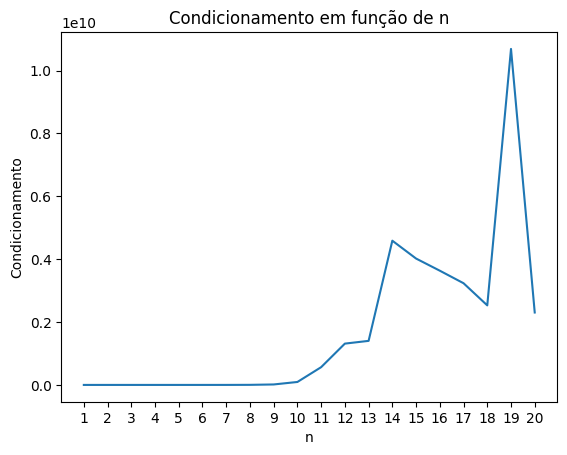

In [27]:
from IPython.display import clear_output
from time import sleep

m = 100
n = 20

t = np.linspace(0, m, m+1)/m
conditions = []

for j in range(n):
    clear_output(wait = True)
    A = poly_ls(m, j+1)

    condition_A = np.linalg.norm(A, ord=np.inf) * np.linalg.norm( np.linalg.solve(A.T @ A, A.T), ord=np.inf )

    conditions.append(condition_A)


plt.title("Condicionamento em função de n")
plt.ylabel('Condicionamento')
plt.xlabel('n')
plt.xticks(range(1, n+1))

plt.plot(range(1, n+1), conditions)

plt.show()

É possível visualizar um comportamento um tanto quanto aleatório na função em alguns números, mas por que isso acontece? Bem, vamos dar uma analisada nas normas antes, para ess caso, a norma infinito acaba sendo mais fácil de tratarmos!
$$
A = \begin{bmatrix}
         1   &     0       &        0        &  ...  &        0          \\
         1   & \frac{1}{m} &  \frac{1}{m^2}  &  ...  &   \frac{1}{m^n}   \\
         1   & \frac{2}{m} &  \frac{4}{m^2}  &  ...  &   \frac{2^n}{m^n} \\
      \vdots &   \vdots    &      \vdots     & \ddots &      \vdots      \\
         1   &     1       &        1        &  ...  &        1          \\
\end{bmatrix}
$$

Conseguimos ver facilmente que $\|A\|_{\infin} = n+1$, o problema é $\|A^{+}\|_{\infin}$, vamos dar uma analisada pelo computador mesmo:

In [28]:
m = 100
n = 20

t = np.linspace(0, m, m+1)/m

for j in range(n):
    A = poly_ls(m, j+1)

    print(f"======= n = {j+1} =======")
    print(f'Norma infinito de A: {np.linalg.norm(A, ord=np.inf)}')
    print(f'Norma infinito de A⁺: {np.linalg.norm( np.linalg.solve(A.T @ A, A.T), ord=np.inf )}')

======= n = 1 =======
Norma infinito de A: 2.0
Norma infinito de A⁺: 2.97029702970297
======= n = 2 =======
Norma infinito de A: 3.0
Norma infinito de A⁺: 11.553980298086747
======= n = 3 =======
Norma infinito de A: 4.0
Norma infinito de A⁺: 66.88789701604878
======= n = 4 =======
Norma infinito de A: 5.0
Norma infinito de A⁺: 349.2828344592223
======= n = 5 =======
Norma infinito de A: 6.0
Norma infinito de A⁺: 1720.8024241461892
======= n = 6 =======
Norma infinito de A: 7.0
Norma infinito de A⁺: 9300.133030006189
======= n = 7 =======
Norma infinito de A: 8.0
Norma infinito de A⁺: 52202.707923237256
======= n = 8 =======
Norma infinito de A: 9.0
Norma infinito de A⁺: 280228.989238735
======= n = 9 =======
Norma infinito de A: 10.0
Norma infinito de A⁺: 1470036.2871786444
======= n = 10 =======
Norma infinito de A: 11.0
Norma infinito de A⁺: 8530806.34325446
======= n = 11 =======
Norma infinito de A: 12.0
Norma infinito de A⁺: 47065540.15497371
======= n = 12 =======
Norma infinito

Conseguimos, então, notar um crescimento linear, porém com oscilações, estas que são causadas por $A^+$

=================================================================================================

**f. Centralizando. Use agora $t_i = i/m − 1/2$. Modifique a função poly_ls e compare graficamente os números de condicionamento**

In [23]:
def new_poly_ls(m: int, n: int) -> np.ndarray:
    t = np.linspace(0, m, m+1)/m - 1/2
    t = t.reshape(-1, 1)
    A = t**0
    
    for j in range(n):
        A = np.c_[A, t**(j+1)]

    return A

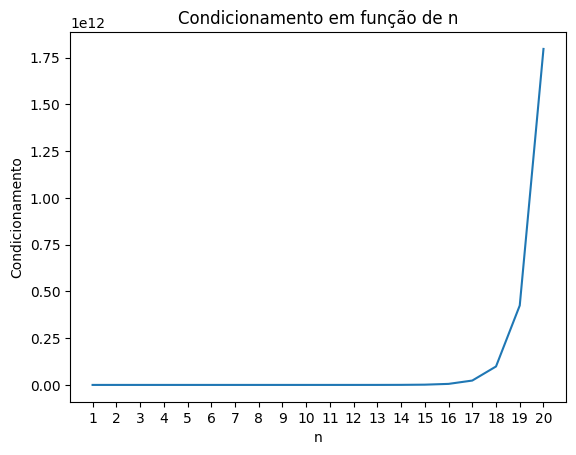

In [29]:
m = 100
n = 20

t = np.linspace(0, m, m+1)/m - 1/2
conditions = []

for j in range(n):
    A = new_poly_ls(m, j+1)

    condition_A = np.linalg.norm(A, ord=np.inf) * np.linalg.norm( np.linalg.solve(A.T @ A, A.T), ord=np.inf )

    conditions.append(condition_A)


plt.title("Condicionamento em função de n")
plt.ylabel('Condicionamento')
plt.xlabel('n')
plt.xticks(range(1, n+1))

plt.plot(range(1, n+1), conditions)

plt.show()

Nossa! Agora temos uma curva mais suave, mas por quê? Primeiro, vamos analisar $\|A\|_{\infin}$. Vamos ter que a soma dos elementos de cada linha vai ser:
$$
a_k = \sum_{j=0}^n|\frac{2k - m}{2m}|^j
$$
Podemos ver que $\frac{2k - m}{2m} \in [-\frac{1}{2}, \frac{1}{2}]$, logo, o maior valor possível é
$$
a_k = \sum_{j=0}^n|\frac{1}{2}|^j
$$
Pela soma da PG, temos
$$
a_k = \frac{1 - \frac{1}{2^n}}{1 - \frac{1}{2}} = \frac{2^n - 1}{2^{n-1}}
$$
$$
\lim_{n \rightarrow \infin}{\frac{2^n - 1}{2^{n-1}}} = \lim_{n \rightarrow \infin}{2 - \frac{1}{2^{n-1}}} = 2
$$

Ou seja, o condicionamento de $A$ converge para $2$! Vejamos agora o que acontece com a norma de $A^+$

In [31]:
m = 100
n = 20

t = np.linspace(0, m, m+1)/m

for j in range(n):
    A = new_poly_ls(m, j+1)

    print(f"======= n = {j+1} =======")
    print(f'Norma infinito de A: {np.linalg.norm(A, ord=np.inf)}')
    print(f'Norma infinito de A⁺: {np.linalg.norm( np.linalg.solve(A.T @ A, A.T), ord=np.inf )}')

======= n = 1 =======
Norma infinito de A: 1.5
Norma infinito de A⁺: 2.970297029702971
======= n = 2 =======
Norma infinito de A: 1.75
Norma infinito de A⁺: 11.322662820251173
======= n = 3 =======
Norma infinito de A: 1.875
Norma infinito de A⁺: 44.18733461826255
======= n = 4 =======
Norma infinito de A: 1.9375
Norma infinito de A⁺: 173.94451709738195
======= n = 5 =======
Norma infinito de A: 1.96875
Norma infinito de A⁺: 686.2415486689007
======= n = 6 =======
Norma infinito de A: 1.984375
Norma infinito de A⁺: 2710.9317170612553
======= n = 7 =======
Norma infinito de A: 1.9921875
Norma infinito de A⁺: 10749.074969005207
======= n = 8 =======
Norma infinito de A: 1.99609375
Norma infinito de A⁺: 42848.00525364307
======= n = 9 =======
Norma infinito de A: 1.998046875
Norma infinito de A⁺: 169343.73746325675
======= n = 10 =======
Norma infinito de A: 1.9990234375
Norma infinito de A⁺: 675627.7389947185
======= n = 11 =======
Norma infinito de A: 1.99951171875
Norma infinito de A⁺:

Agora podemos ver que a norma de $A^+$ está começando a crescer gradativamente, em vez de ter picos descontrolados como antes. Eu acho que isso acontece pela simetria de linhas que $A$ possui, o que eu acho que causa que $A^+$ também tenha uma certa semelhança, se não simetria, em suas linhas, o que faz com que sua norma cresça gradativamente, mas não chegue a crescer e diminuir repentinamente